In [1]:
!pip install scikit-plot

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scikitplot as skplt
from scipy.stats import reciprocal, uniform

In [3]:
x, y = make_moons()

print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [4]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

print("Treino: ", x_treino.shape)
print("Teste: ", y_treino.shape)

Treino:  (70, 2)
Teste:  (70,)


In [5]:
polynomial_svm_clf = Pipeline([
                               ("poly_features", PolynomialFeatures(degree=3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf", LinearSVC())
])

In [6]:
polynomial_svm_clf.fit(x_treino, y_treino)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('svm_clf', LinearSVC())])

In [7]:
previsao = polynomial_svm_clf.predict(x_teste)
print(accuracy_score(y_teste, previsao))

1.0


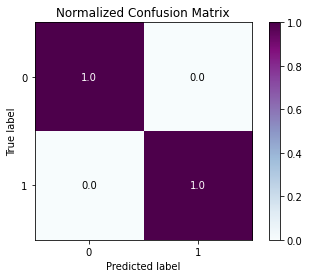

In [8]:
skplt.metrics.plot_confusion_matrix(y_teste, previsao, normalize=True, cmap="BuPu")

In [11]:
#param_grid = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
param_grid = {"C": uniform(1, 100), "max_iter": np.arange(1000, 2000, 100)}

scoring = {"ACC": "accuracy", 'AUC':'roc_auc'}

SVC = RandomizedSearchCV(LinearSVC(), param_grid, cv=10,return_train_score=True, scoring=scoring, refit='AUC')

In [12]:
SVC.fit(x_treino, y_treino)
print(SVC.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

{'C': 89.19487798872846, 'max_iter': 1400}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [13]:
SVC.best_score_

0.9666666666666666

In [25]:
SVC.scorer_

{'ACC': make_scorer(accuracy_score),
 'AUC': make_scorer(roc_auc_score, needs_threshold=True)}

In [14]:
SVC.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_max_iter', 'params', 'split0_test_ACC', 'split1_test_ACC', 'split2_test_ACC', 'split3_test_ACC', 'split4_test_ACC', 'split5_test_ACC', 'split6_test_ACC', 'split7_test_ACC', 'split8_test_ACC', 'split9_test_ACC', 'mean_test_ACC', 'std_test_ACC', 'rank_test_ACC', 'split0_train_ACC', 'split1_train_ACC', 'split2_train_ACC', 'split3_train_ACC', 'split4_train_ACC', 'split5_train_ACC', 'split6_train_ACC', 'split7_train_ACC', 'split8_train_ACC', 'split9_train_ACC', 'mean_train_ACC', 'std_train_ACC', 'split0_test_AUC', 'split1_test_AUC', 'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC', 'split5_test_AUC', 'split6_test_AUC', 'split7_test_AUC', 'split8_test_AUC', 'split9_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC', 'split0_train_AUC', 'split1_train_AUC', 'split2_train_AUC', 'split3_train_AUC', 'split4_train_AUC', 'split5_train_AUC', 'split6_train_AUC', 'split7_train_AUC', 'spli

In [15]:
SVC.cv_results_['split1_test_ACC']

array([0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
       0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286])

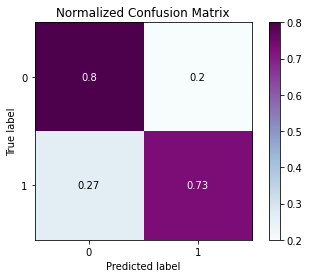

In [16]:
previsao = SVC.predict(x_teste)
skplt.metrics.plot_confusion_matrix(y_teste, previsao, normalize=True, cmap="BuPu")

Precision = True Position/(True Position + False Positive)

In [17]:
precision = 0.73 / (0.73 + 0.2)
print("Precision: ", precision)

Precision:  0.7849462365591399


Recall = True Positive / (True Positive + False Negative)

In [18]:
recall = 0.73 / (0.73 + 0.27)
print("Recall: ", recall)

Recall:  0.73


Specificity = True Negative / (True Negative + False Negative)

In [27]:
specificity = 0.8 / (0.8+0.27)
print("Specificity: ", specificity)

Specificity:  0.7476635514018691
